In [5]:
import pandas
import requests
import re
%pip install networkx
import networkx as nx

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
url = "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270"

try:
    httpReq = requests.get(url, proxies=None)
except NameError:
    httpReq = requests.get(url)
ans = httpReq.text
print(ans)

uniprotkb:P0CW72	uniprotkb:P0CW72	intact:EBI-2620133|uniprotkb:Q777A5	intact:EBI-2620133|uniprotkb:Q777A5	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:"MI:0397"(two hybrid array)	Calderwood et al. (2007)	pubmed:17446270|imex:IM-20435|mint:MINT-6769080	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	psi-mi:"MI:0915"(physical association)	psi-mi:"MI:0469"(IntAct)	intact:EBI-2620961|imex:IM-20435-3	author score:+|intact-miscore:0.51
uniprotkb:P14348	uniprotkb:P0C704	intact:EBI-2620158|intact:EBI-9645437|uniprotkb:Q777G5	intact:EBI-2620975|uniprotkb:Q3KSQ5	psi-mi:scp_ebvb9(display_long)|uniprotkb:SCP(gene nam

In [3]:
def mitabReader(httpText):
    for line in ans.split("\n"):
        _ = line.split("\t")
        if len(_) > 1 and _[0].startswith("uniprotkb:")\
                      and _[1].startswith("uniprotkb:"):
            yield [ _[0].replace("uniprotkb:", ""),\
                    _[1].replace("uniprotkb:", "") ]\
                  + _[2:]


def isMitab_EBV_EBV(mitabArray):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]) and re.search(reEBV, mitabArray[10]):
        return True
    return False

def isMitab_Human_EBV(mitabArray):
    # Je ferai ça plus tard
    reHUMAN   = "taxid:9606"
    if re.search(reHUMAN, mitabArray[9]) or re.search(reHUMAN, mitabArray[10]):
        return True
    return False


EBV_EBV_mitab   = []
EBV_Human_mitab = []
total = 0
for mitabArray in mitabReader(ans):
    total += 1
    if isMitab_EBV_EBV(mitabArray):
        EBV_EBV_mitab.append(mitabArray)
    elif isMitab_Human_EBV(mitabArray):
        EBV_Human_mitab.append(mitabArray)
    else :
        raise ValueError("Je ne connais pas cette espece ==> ", mitabArray[9:11])

print(f"Nombre total d'interactions {total}, EBV-EBV {len(EBV_EBV_mitab)}, EBV-Human {len(EBV_Human_mitab)}")

Nombre total d'interactions 230, EBV-EBV 59, EBV-Human 171


In [ ]:
EBV_protein = set()

In [21]:
def find_Human_prot(mitabArray):
    reHUMAN   = "taxid:9606"
    if re.search(reHUMAN, mitabArray[9]):
        return re.search(reHUMAN, mitabArray[0])
    elif re.search(reHUMAN, mitabArray[10]):
        return re.search(reHUMAN, mitabArray[1])

def find_EBV_prot(mitabArray):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]):
        return re.search(reHUMAN, mitabArray[0])
    elif re.search(reEBV, mitabArray[10]):
        return re.search(reHUMAN, mitabArray[1])
    
def unique(_):
    unique_list = []
    for x in _:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

          
HUMAN_prot = []
EBV_prot = []
for mitabArray in EBV_EBV_mitab:
    HUMAN_prot += find_Human_prot(mitabArray)
    EBV_prot += find_EBV_prot(mitabArray)
          
print(len(unique(nb_HUMAN_prot)))
print(len(unique(nb_EBV_prot)))

mitabArray ['P0CW72', 'P0CW72', 'intact:EBI-2620133|uniprotkb:Q777A5', 'intact:EBI-2620133|uniprotkb:Q777A5', 'psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)', 'psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)', 'psi-mi:"MI:0397"(two hybrid array)', 'Calderwood et al. (2007)', 'pubmed:17446270|imex:IM-20435|mint:MINT-6769080', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'psi-mi:"MI:0915"(physical association)', 'psi-mi:"MI:0469"(IntAct)', 'intact:EBI-2620961|imex:IM-20435-3', 'author score:+|intact-miscore:0.51']


TypeError: 'NoneType' object is not iterable

In [24]:
EBV_prot = []
reEBV   = "taxid:(1037[6-7]|82830)"
for mitabArray in EBV_EBV_mitab:
    EBV_prot.append(re.search(reEBV, mitabArray[0]))
    EBV_prot.append(re.search(reEBV, mitabArray[1]))
print(EBV_prot)
print(len(unique(EBV_prot)))

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
1


In [19]:
nb_HUMAN_prot = 0
nb_EBV_prot = 0
for mitabArray in EBV_Human_mitab:
    nb_HUMAN_prot += count_Human_prot(mitabArray)
    nb_EBV_prot += count_EBV_prot(mitabArray)
          
print(nb_HUMAN_prot)
print(nb_EBV_prot)

171
171


In [26]:
%pip install networkx
import networkx as nx
G = nx.Graph()

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
G.add_edge("a","b", weight=12, scope='book')
G.add_edge("c","b")
G["a"]["b"]["scope"]

'book'

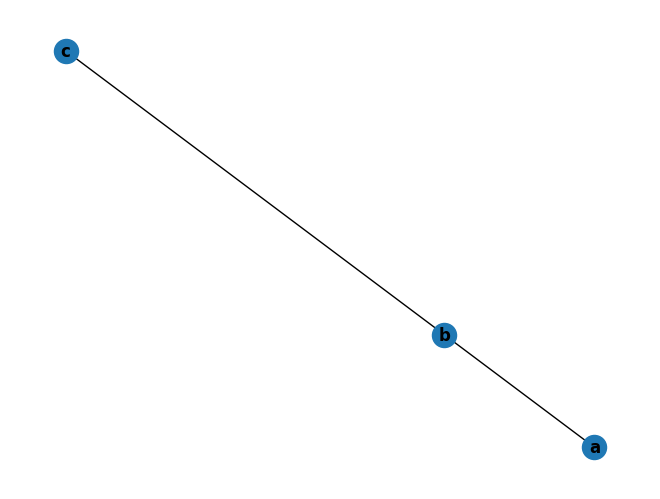

In [30]:
nx.draw(G, with_labels = True, font_weight = 'bold')

In [15]:
G = nx.Graph()

for inter in EBV_EBV_mitab:
    G.add_edge(inter[0],inter[1], weight=12, scope=inter)

In [38]:
G_h = nx.Graph()

colors = []
for inter in EBV_Human_mitab:
    if inter[9] == "taxid:(1037[6-7]|82830)":
        colors += ["blue", "red"]
    else:
        colors += ["red", "blue"]
    G_h.add_edge(inter[0],inter[1], weight=12, scope=inter)


ValueError: 'c' argument has 342 elements, which is inconsistent with 'x' and 'y' with size 154.

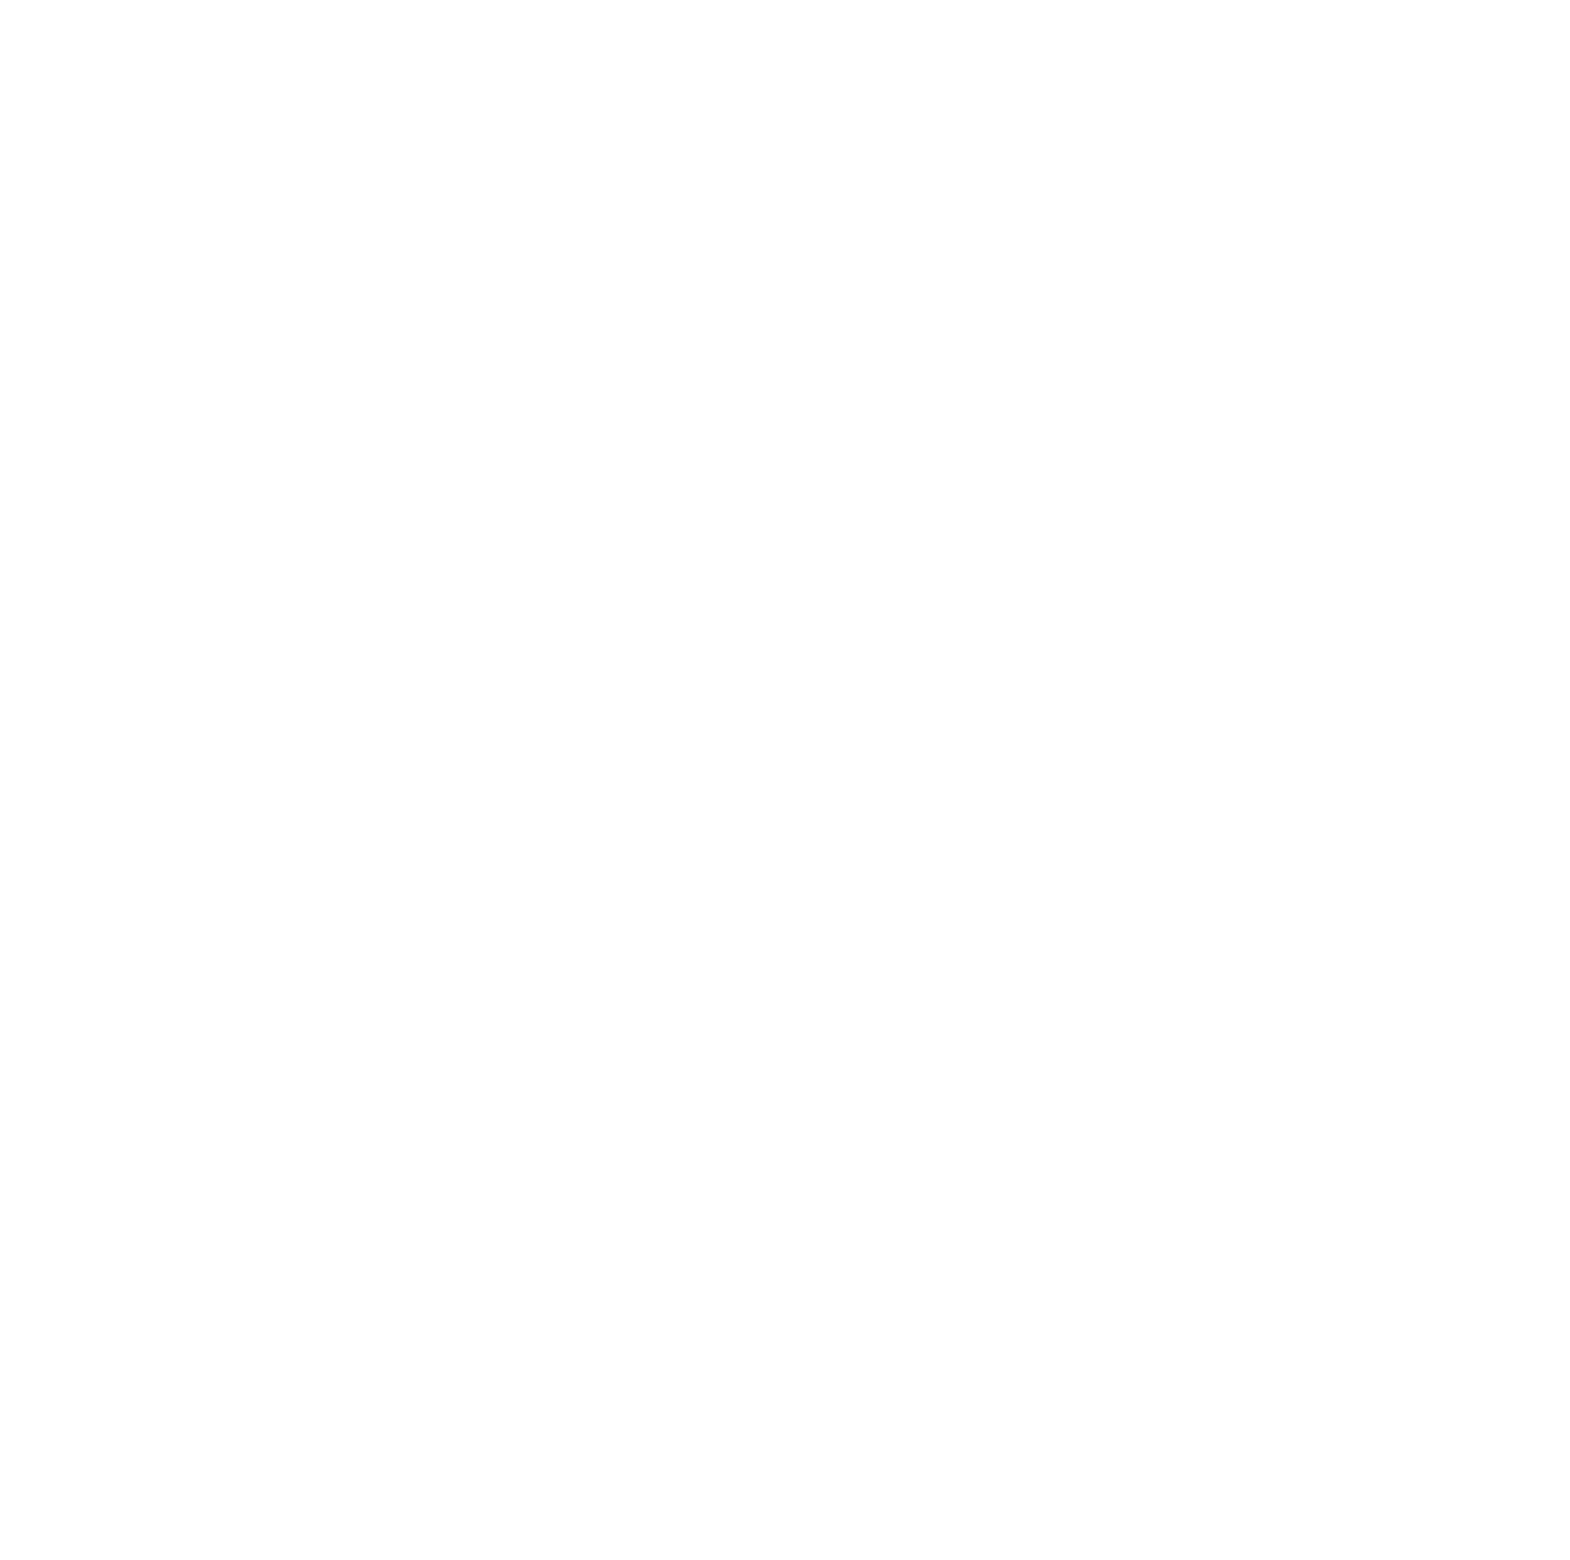

In [39]:
import matplotlib
from matplotlib import pyplot as plt

h_fig, h_ax = plt.subplots(figsize = (20,20))
h_ax.set_axis_off()





pos = nx.spring_layout(G_h, k=0.2)
nx.draw(G_h, node_size = 250, ax= h_ax, pos = pos, with_labels = True, node_color = colors)


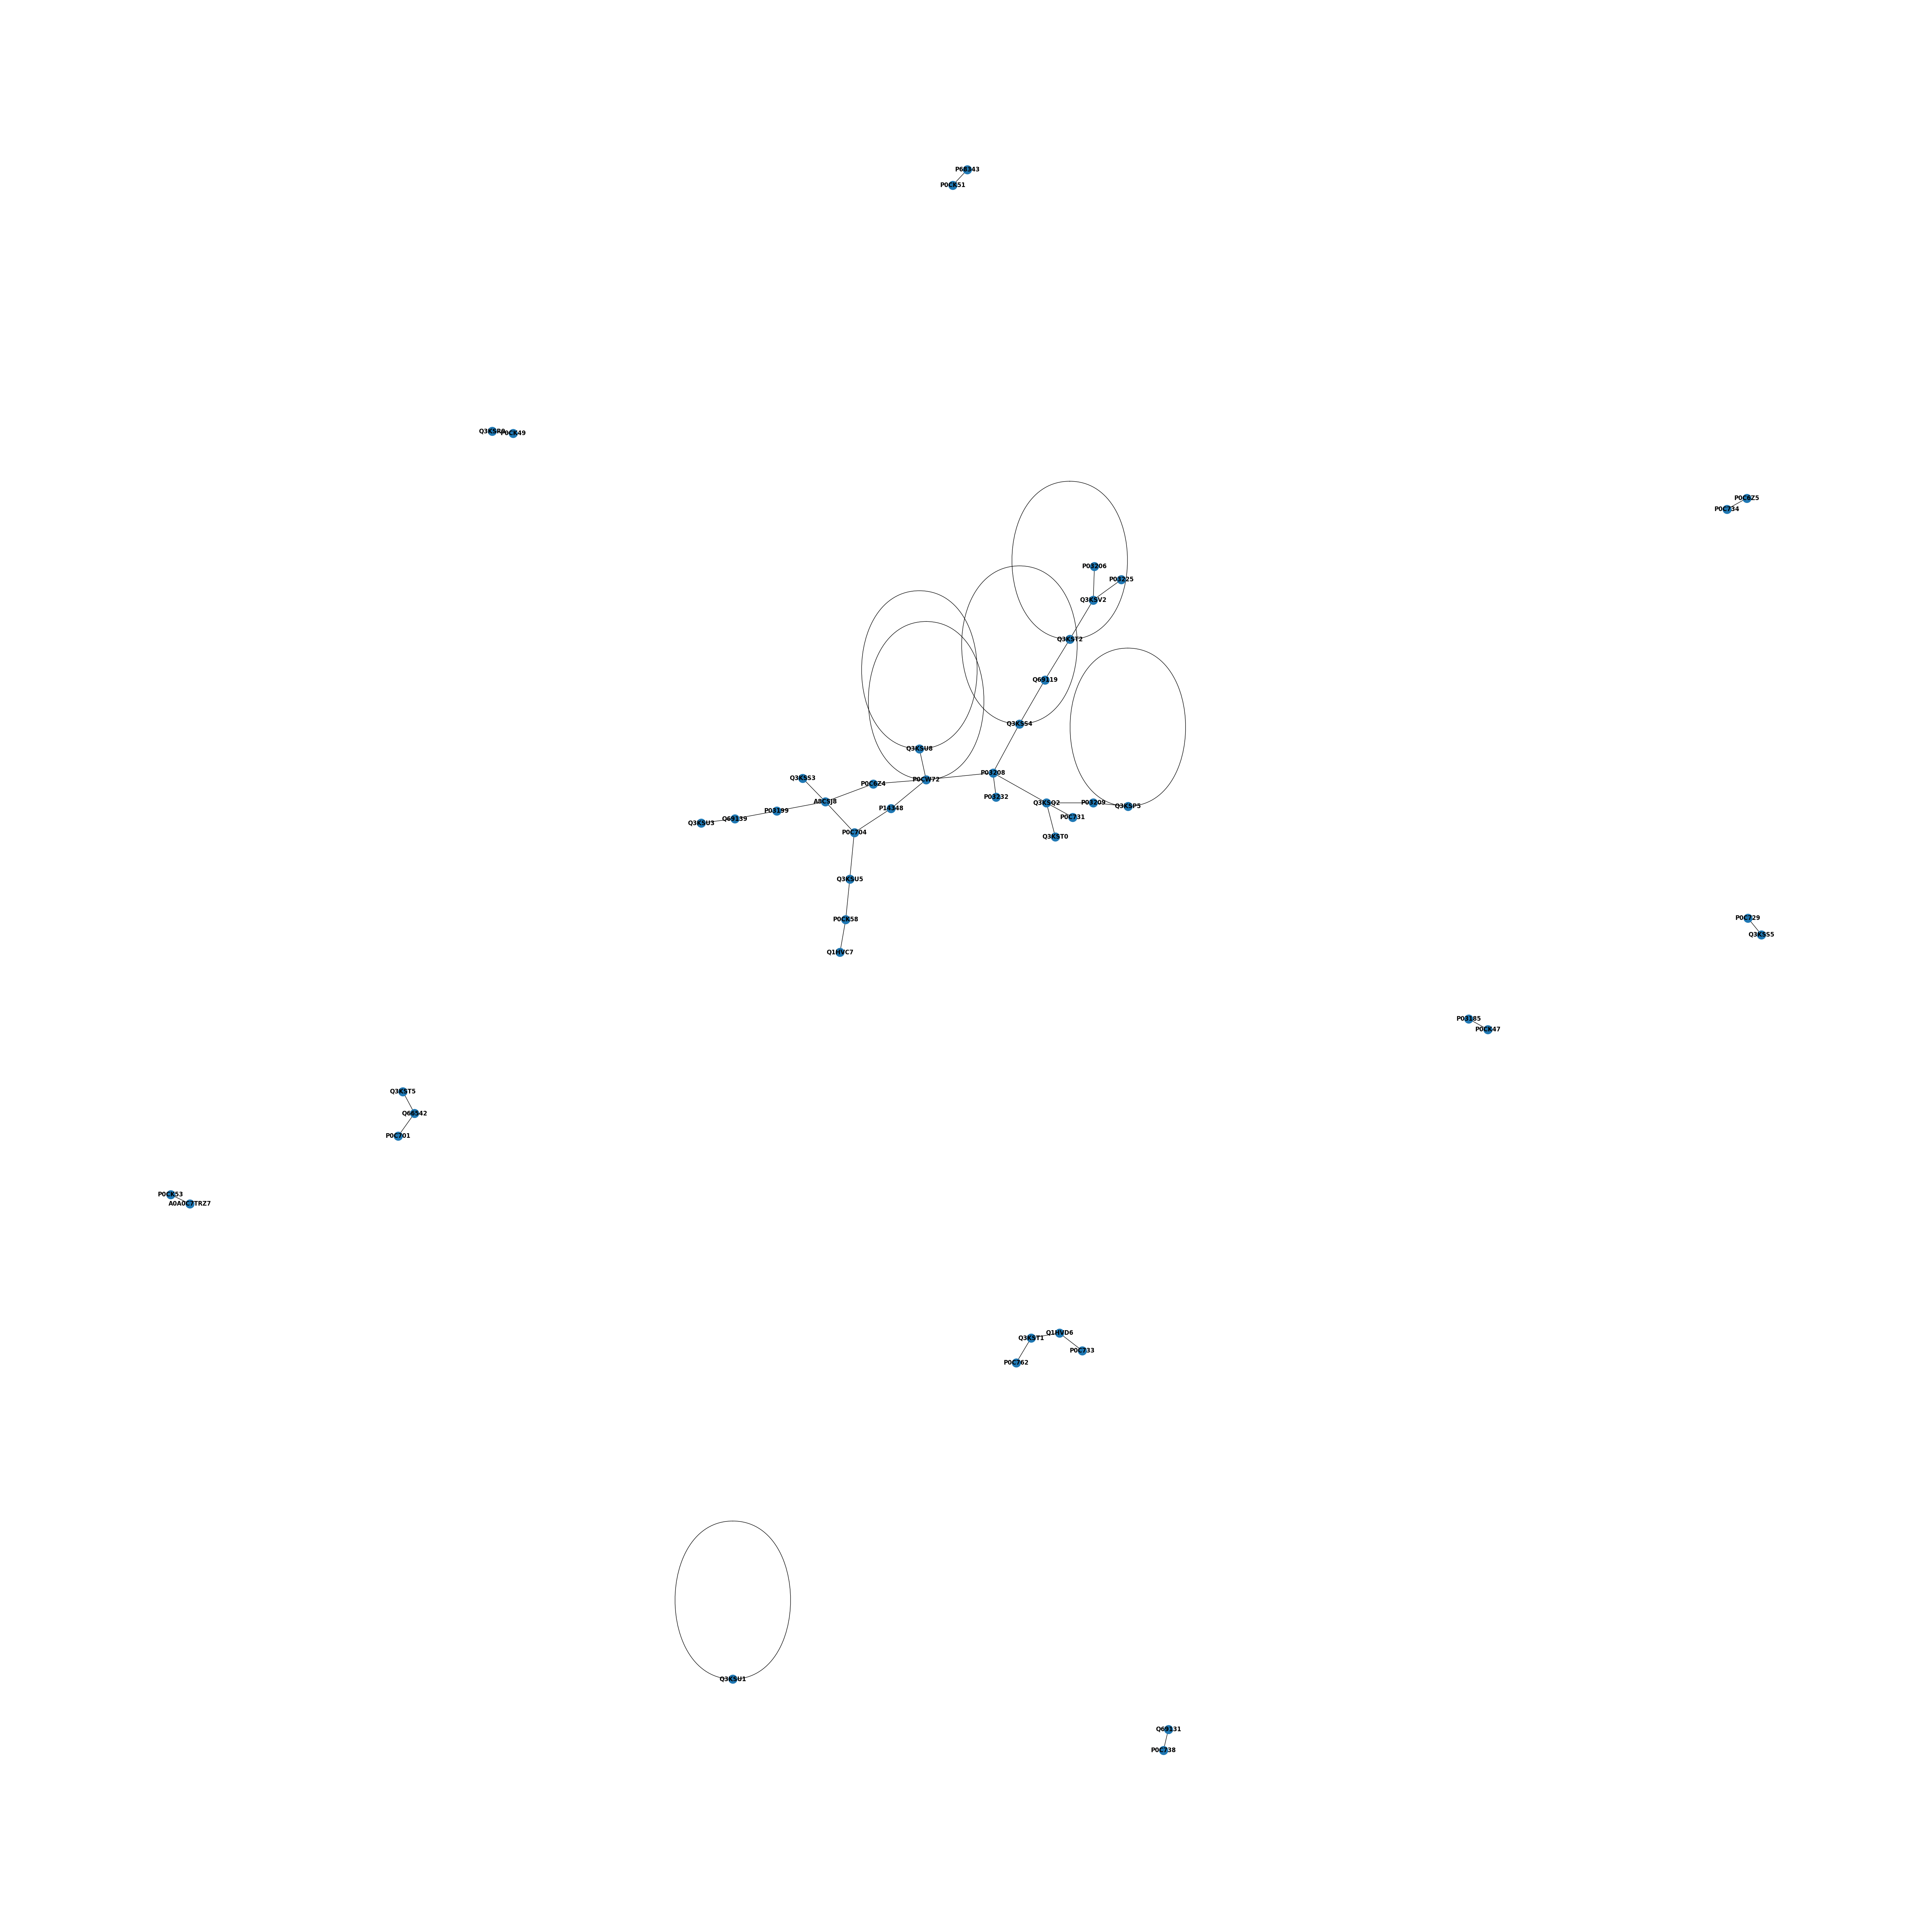

In [18]:
ebv_fig, ebv_ax = plt.subplots(figsize = (70,70))
ebv_ax.set_axis_off()
nx.draw(G, with_labels = True, font_weight = 'bold')